# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [2]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

# this class is just responsible for the cart object and the actions of the cart object
class Cart():
    def __init__(self):
        self.items = {}
    
    def add(self):
        clear()
        new_item = input("What do you want to get? ")
        quantity = int(input(f"How many {new_item}s do you want? (insert number) "))
        if new_item not in self.items.keys():
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}s are in the cart")
        
    def remove(self):
        clear()
        discard = input('What would you like to discard? ')
        quantity = int(input(" How many would you like to discard? "))
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f'{quantity} {discard}s have been removed.')
        except:
            print(f'{discard} was not in your cart.')
        self.show()
        
    def show(self):
        print(f"Your cart contains the listed items")
        for item,quantity in self.items.items():
            print(f"{item} | quantity: {quantity}")
            
    def checkout(self):
        clear()
        if not self.items:
            print("buy something next time... Please")
        else:
            print('Thanks for shopping!')
            self.show()
        
    
    
# control the logic and flow/operation of our overall program
class Main:
    def showInstructions():
        print("""
Welcome to the Shopping Program.
Options:
[1] Show Current Cart
[2] Add Item
[3] Remove Item
[4] Quit
        """)
    
    # driver code - responsible for actually calling all of my functions
    def run():
        Main.showInstructions()
        my_cart = Cart()
        
        while True:
            choice = input("What would you like to do? ")
            if choice == '1':
                if my_cart.items == {}:
                    print('Your cart is empty... start shopping')
                else:
                    my_cart.show()
            elif choice == '2':
                my_cart.add()
            elif choice == '3':
                if my_cart.items == {}:
                    print('your cart is empty... add something before you remove it')
                else:
                    my_cart.remove()
            elif choice == '4':
                my_cart.checkout()
                break
            else:
                print("invalid input... please try again.")
                
Main.run()

buy something next time... Please


# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [2]:
# making an API call
import requests

r = requests.get('https://pokeapi.co/api/v2/pokemon/haunter')
if r.status_code == 200:
    data = r.json()

print(data.keys())



dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [3]:
# name, abilities, types, and weight
# get the name
name = data['name']
print(name)

haunter


In [4]:
# get types
types = [pokemon['type']['name'] for pokemon in data['types']]

print(types)

['ghost', 'poison']


In [5]:
# get weight
weight = data['weight']
print(weight)

1


In [9]:
# get abilities
abilities = [pokemon['ability']['name'] for pokemon in data['abilities']]
print(abilities)

['levitate']


In [8]:
# Create a structure for a single pokemon
pokemon_x = {
    
'name': '',
'abilities': [],
'weight': '',
'types': []
}


In [12]:
haunter = {
    "name": name,
    'abilities': abilities,
    'weight': weight,
    'types' : types
}
haunter

{'name': 'haunter',
 'abilities': ['levitate'],
 'weight': 1,
 'types': ['ghost', 'poison']}

#### Create a function to Pull in your own Pokemon's data 

In [36]:
from random import randint
# # Random number generated for each pokemon id
pokemans = [randint(1,898) for i in range(6)]

the_team = ['klang', 'whimsicott','burmy','poliwrath','electrike','clauncher']

print(pokemans)
def poke_api_call(pokemon):
    req = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon}')
    if req.status_code == 200:
        data = req.json()
    
        name = data['name']
        types = [pokemon['type']['name'] for pokemon in data['types']]
        abilities = [pokemon['ability']['name'] for pokemon in data['abilities']]
        weight = data['weight']
    
        poke = {
            "name": name,
            'abilities': abilities,
            'weight': weight,
            'types' : types
        }
        return poke

[856, 129, 842, 198, 314, 89]


In [30]:
poke_api_call("klang")

{'name': 'klang',
 'abilities': ['plus', 'minus', 'clear-body'],
 'weight': 510,
 'types': ['steel']}

#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [38]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}

for member in pokemans:
    poke_stats = poke_api_call(member)
    my_six_pokemon[poke_stats['name'].title()] = poke_stats

my_six_pokemon

{'Hatenna': {'name': 'hatenna',
  'abilities': ['healer', 'anticipation', 'magic-bounce'],
  'weight': 34,
  'types': ['psychic']},
 'Magikarp': {'name': 'magikarp',
  'abilities': ['swift-swim', 'rattled'],
  'weight': 100,
  'types': ['water']},
 'Appletun': {'name': 'appletun',
  'abilities': ['ripen', 'gluttony', 'thick-fat'],
  'weight': 130,
  'types': ['grass', 'dragon']},
 'Murkrow': {'name': 'murkrow',
  'abilities': ['insomnia', 'super-luck', 'prankster'],
  'weight': 21,
  'types': ['dark', 'flying']},
 'Illumise': {'name': 'illumise',
  'abilities': ['oblivious', 'tinted-lens', 'prankster'],
  'weight': 177,
  'types': ['bug']},
 'Muk': {'name': 'muk',
  'abilities': ['stench', 'sticky-hold', 'poison-touch'],
  'weight': 300,
  'types': ['poison']}}

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [39]:
class Pokemon():
    def __init__(self,name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f'Ran into an issue {r.status_code}')
            return
        self.name = pokemon['name']
        self.types = [pokemon['type']['name'] for pokemon in data['types']]
        self.abilities = [poke['ability']['name'] for poke in data['abilities']]
        self.weight = pokemon['weight']
        print(f'{self.name}\'data has been updated! ')
        
    def __repr__(self):
        return f"You caught a {self.name}!!"



### Let's Catch some Pokemon

In [42]:
pikachu = Pokemon('pikachu')

print(pikachu.__dict__)

print(type(pikachu))

print(pikachu)

pikachu'data has been updated! 
{'name': 'pikachu', 'types': ['ghost', 'poison'], 'abilities': ['levitate'], 'weight': 60}
<class '__main__.Pokemon'>
You caught a pikachu!!


In [41]:
pokemon = ['lugia', 'pikachu', 'charmander', 'bulbasaur', 'squirtle', 'hitmonlee']
randoms = [ randint(1,898) for i in range(6)]
# dictionary of structure {name: object,}
pokedex = {}

for name in randoms:
    new = Pokemon(name)
    pokedex[new.name] = new
    
pokedex

electivire'data has been updated! 
ferrothorn'data has been updated! 
drapion'data has been updated! 
exploud'data has been updated! 
zamazenta'data has been updated! 
sliggoo'data has been updated! 


{'electivire': You caught a electivire!!,
 'ferrothorn': You caught a ferrothorn!!,
 'drapion': You caught a drapion!!,
 'exploud': You caught a exploud!!,
 'zamazenta': You caught a zamazenta!!,
 'sliggoo': You caught a sliggoo!!}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

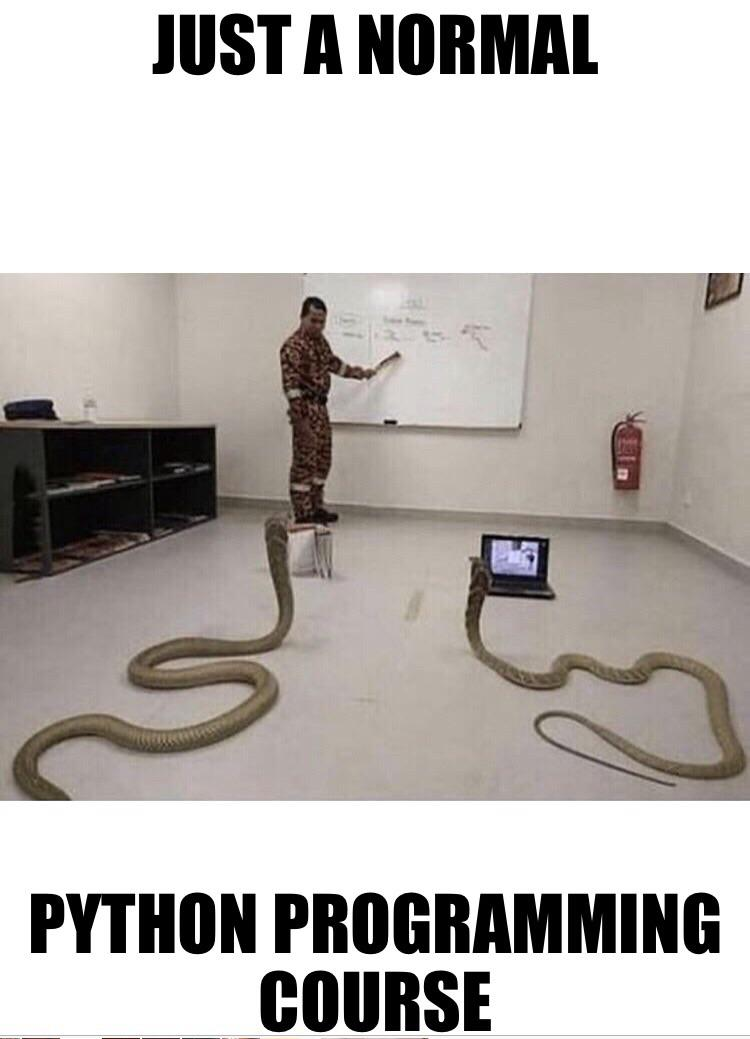

In [68]:
# Display an image in Jupyter notebook
from IPython.display import Image,  SVG
display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [94]:

class Pokemon(Evolver):
    def __init__(self,name):
        super().__init__()
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = None
        self.image = None
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            pokemon = r.json()
        else:
            print(f'Ran into an issue {r.status_code}')
            return
        self.name = pokemon['name']
        self.types = [pokemon['type']['name'] for pokemon in data['types']]
        self.abilities = [poke['ability']['name'] for poke in data['abilities']]
        self.weight = pokemon['weight']
        self.image = pokemon["sprites"]["other"]["dream_world"]["front_default"]
        print(f'You\'ve got a new {self.name}!')
    
    def display(self):
        display(SVG(url = self.image))
        
    def __repr__(self):
        return f"You caught a {self.name}!!"

You've got a new gengar!
https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/other/dream-world/94.svg


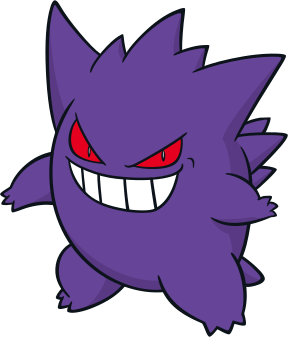

In [74]:
gengar = Pokemon("gengar")

print(gengar.image)
gengar.display()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [4]:
from time import sleep

class Evolver():
        
    def evolve(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}")
        if r.status_code == 200:
            pokemon_species = r.json()
        else:
            print(f'Ran into an issue {r.status_code}')
            return
        
        r = requests.get(pokemon_species['evolution_chain']['url'])
        if r.status_code == 200:
            ev_chain = r.json()
            ev_chain = ev_chain['chain']
        else:
            print(f"Ran into an issue {r.status_code}")
            return
        

        base_name = ev_chain["species"]["name"]

        evolution = ev_chain['evolves_to'][0]
        evolution_name = evolution['species']['name']
        
        if base_name == self.name:
            pass
            
    
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
      
        else:
            print(f"You can't evolve your {self.name} anymore. ")
            return
        
        print('.......')
        sleep(1)
        print(f"Your {self.name} is evolving!?!?")
        self.display()
        sleep(1)
        print('................')
        self.name = evolution_name
        self.poke_api_call()
        self.display()



In [118]:
gengar = Pokemon("gastly")


You've got a new gastly!


.......
Your haunter is evolving!?!?


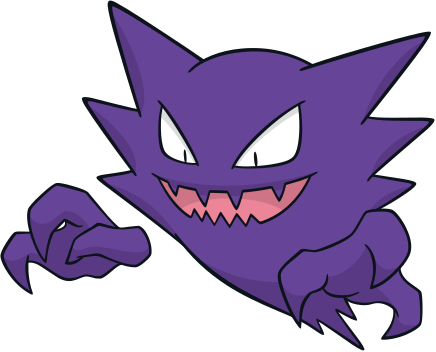

................
You've got a new gengar!


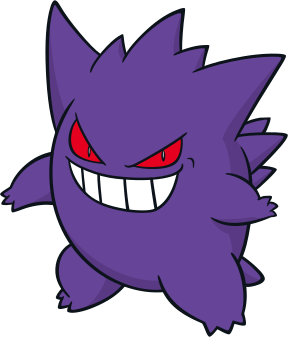

In [120]:
gengar.evolve()

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [5]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []
  
    # def poke_api_call(self):
    #     r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
    #     if r.status_code == 200:
    #         pokemon = r.json()
    #     else:
    #         print(f'Ran into an issue {r.status_code}')
    #         return
    #     self.name = pokemon['name']
    #     self.types = [ poke['type']['name'] for poke in pokemon['types']]
    #     self.abilities -= [ poke['ability']['name'] for poke in pokemon['abilities']]
    #     self.weight= pokemon['weight']
        
    def teach_new_move(self):
        response = input(f'what move would you like to teach?')
        move = self.teach_move(response)
        if len(self.move_list)>= 4:
           print('too many moves. please replace a move')
           print(self.move_list)
           drop_move = input('what move would you like to remove?')
           self.move_list.remove(drop_move)
        self.move_list.append(move)
        print(f'{self.name} has learned {move}')

    def teach_move(self, new_move):
        r = requests.get(f"https://pokeapi.co/api/v2/move/{new_move}")
        if r.status_code == 200:
            moves = r.json()
            move = moves['name']
            poke_dict = {'name': move}
            return poke_dict
        else:
            print(f'Ran into an issue {r.status_code}')
            return

In [7]:
pikachu.teach_new_move()

NameError: name 'pikachu' is not defined

In [8]:
pikachu.teach_move()


NameError: name 'pikachu' is not defined

In [9]:
pikachu.show_moves()

NameError: name 'pikachu' is not defined

In [ ]:
# Electric Company
# Create a function that given a list which represents street lights given as 
# a parameter(l_street), determine if an outage has occurred. 
# A street with a total number of "F" greater than or equal to 2 returns 
# "Outage", anything below returns "Power"
# Example Input: [ 'T', 'F', 'F', 'F' ]
# Example Output: "Outage"

In [ ]:
	def lights_out(s_list):
2	    lights = 'Power'
3	    if s_list.count('F') > 1:
4	        lights = 'Outage'
5	    return lights